In [4]:
import numpy as np
import copy
import pickle

import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['figure.dpi'] = 500

In [5]:
file_location = "../data/Raman_Mouse/approximated/"
filenames = np.load(f"{file_location}FileNames.npy")
with open(f'{file_location}Sample_labels.pickle', 'rb') as f:
    labels = pickle.load(f)
    
wavenumbers = np.load(f"{file_location}Wavenumbers.npy")

data = []
for f in filenames:
    x = np.load(f"{file_location}{f.split('.')[0]}_raman.npy")
#     y = np.load(f"{file_location}{f.split('.')[0]}_photoluminescence.npy")
    data.append(((x.reshape(-1,x.shape[-1])).reshape(x.shape), labels[f]))

24 31 7


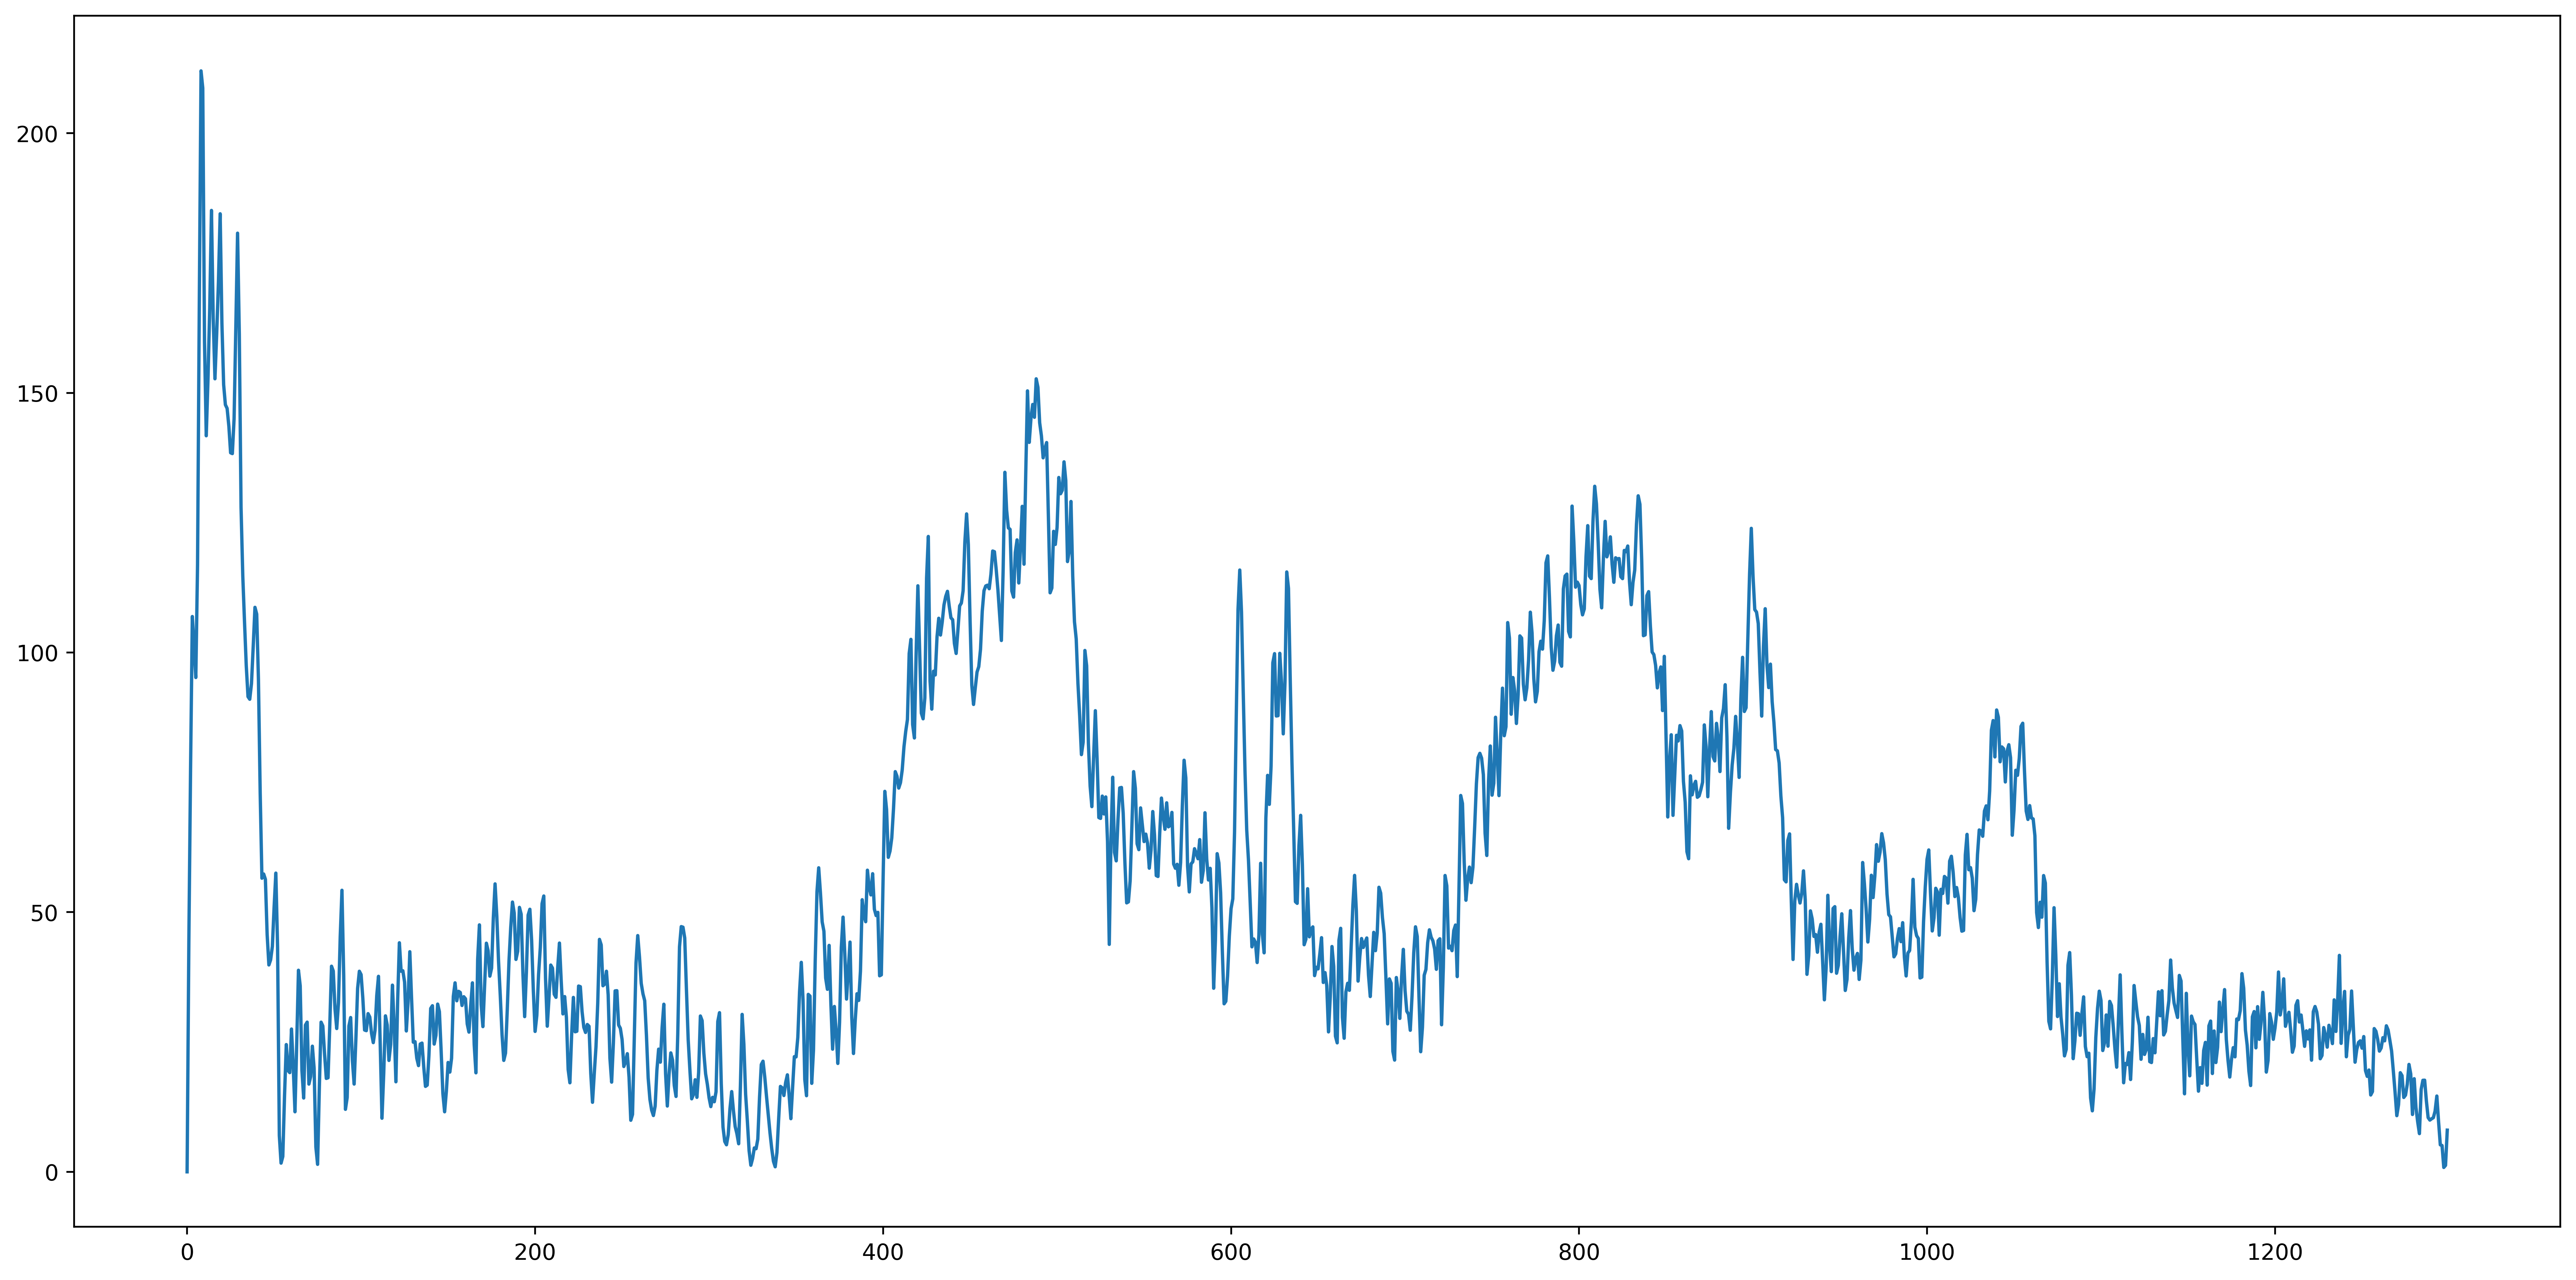

In [10]:
x = np.random.randint(0,150)
y = np.random.randint(0,25)
image = np.random.randint(0,51)
print(image, x, y)
plt.plot(data[image][0][x][y])
plt.show()


pixel (25, 4, 271)


/home/jonne/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


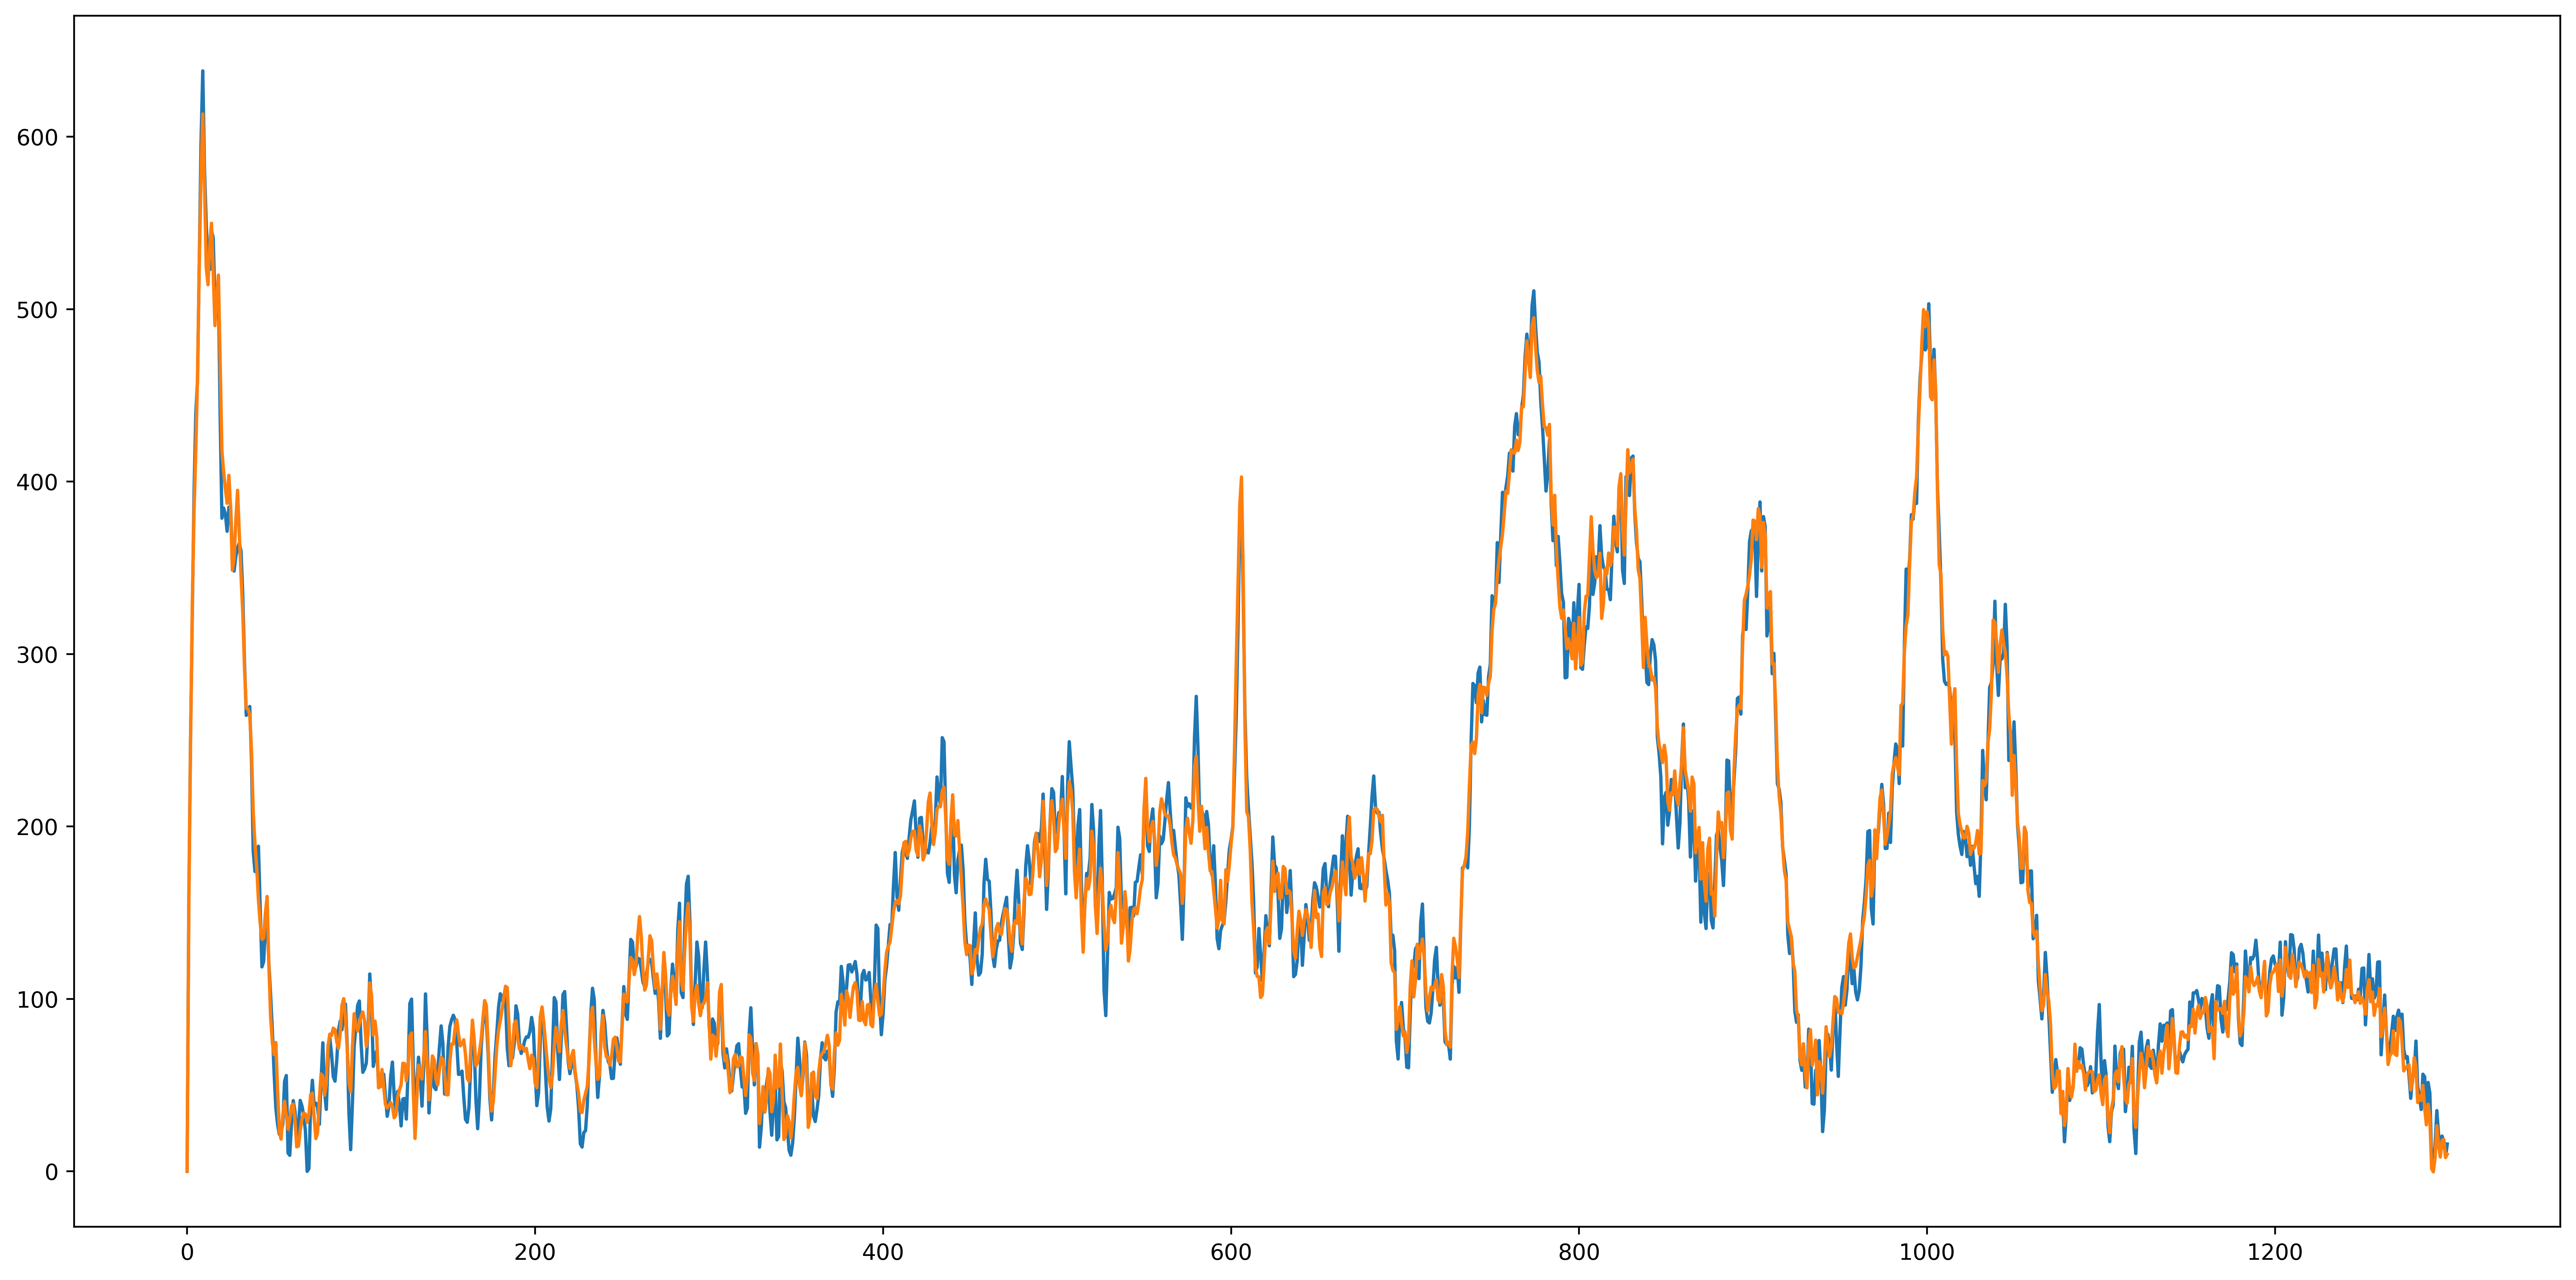

In [29]:
x = np.random.randint(0,150)
y = np.random.randint(0,25)
z = np.random.randint(0,1300)
# x,y = 78,17

print(f"pixel {x, y, z}")
new = []
for z in range(1300):
    tmp = []
    for i in range(150):
        pixel = data[0][0][i][y][z]
        tmp.append(pixel)

    pixel_ft = fft(tmp)
    pixel_ft[40:110] = 0
    new.append(ifft(pixel_ft)[x])
    
plt.plot(data[0][0][x][y])
plt.plot(new)

# cutoff = [0,200,1100,1300]
# for c in cutoff:
#     plt.plot([c, c], [-100,500])

# pixel_ft_sum = copy.copy(pixel_ft)
# pixel_ft_sum[cutoff[1]:cutoff[2]] = 0

# pixel_ft4 = copy.copy(pixel_ft)
# pixel_ft5 = copy.copy(pixel_ft)
# pixel_ft4[cutoff[0]:] = 0
# pixel_ft5[:cutoff[-1]] = 0

# pixel_ft[:cutoff[0]] = 0
# pixel_ft[cutoff[-1]:] = 0

# pixel_ft1 = copy.copy(pixel_ft)
# pixel_ft1[cutoff[1]:] = 0

# pixel_ft2 = copy.copy(pixel_ft)
# pixel_ft2[cutoff[2]:] = 0
# pixel_ft2[:cutoff[1]] = 0

# pixel_ft3 = copy.copy(pixel_ft)
# pixel_ft3[:cutoff[2]] = 0

# plt.plot(ifft(pixel_ft))
# plt.show()

# pixel_ift1 = ifft(pixel_ft1)
# pixel_ift2 = ifft(pixel_ft2)
# pixel_ift3 = ifft(pixel_ft3)
# pixel_ift4 = ifft(pixel_ft4)
# pixel_ift5 = ifft(pixel_ft5)
# pixel_ift_sum = ifft(pixel_ft_sum)

# plt.plot(pixel)
# # plt.plot(pixel_ift_sum)
# plt.plot(pixel_ift4+200)
# plt.plot(pixel_ift1+100)
# plt.plot(pixel_ift2)
# plt.plot(pixel_ift3-100)
# plt.plot(pixel_ift5-200)
# plt.show()


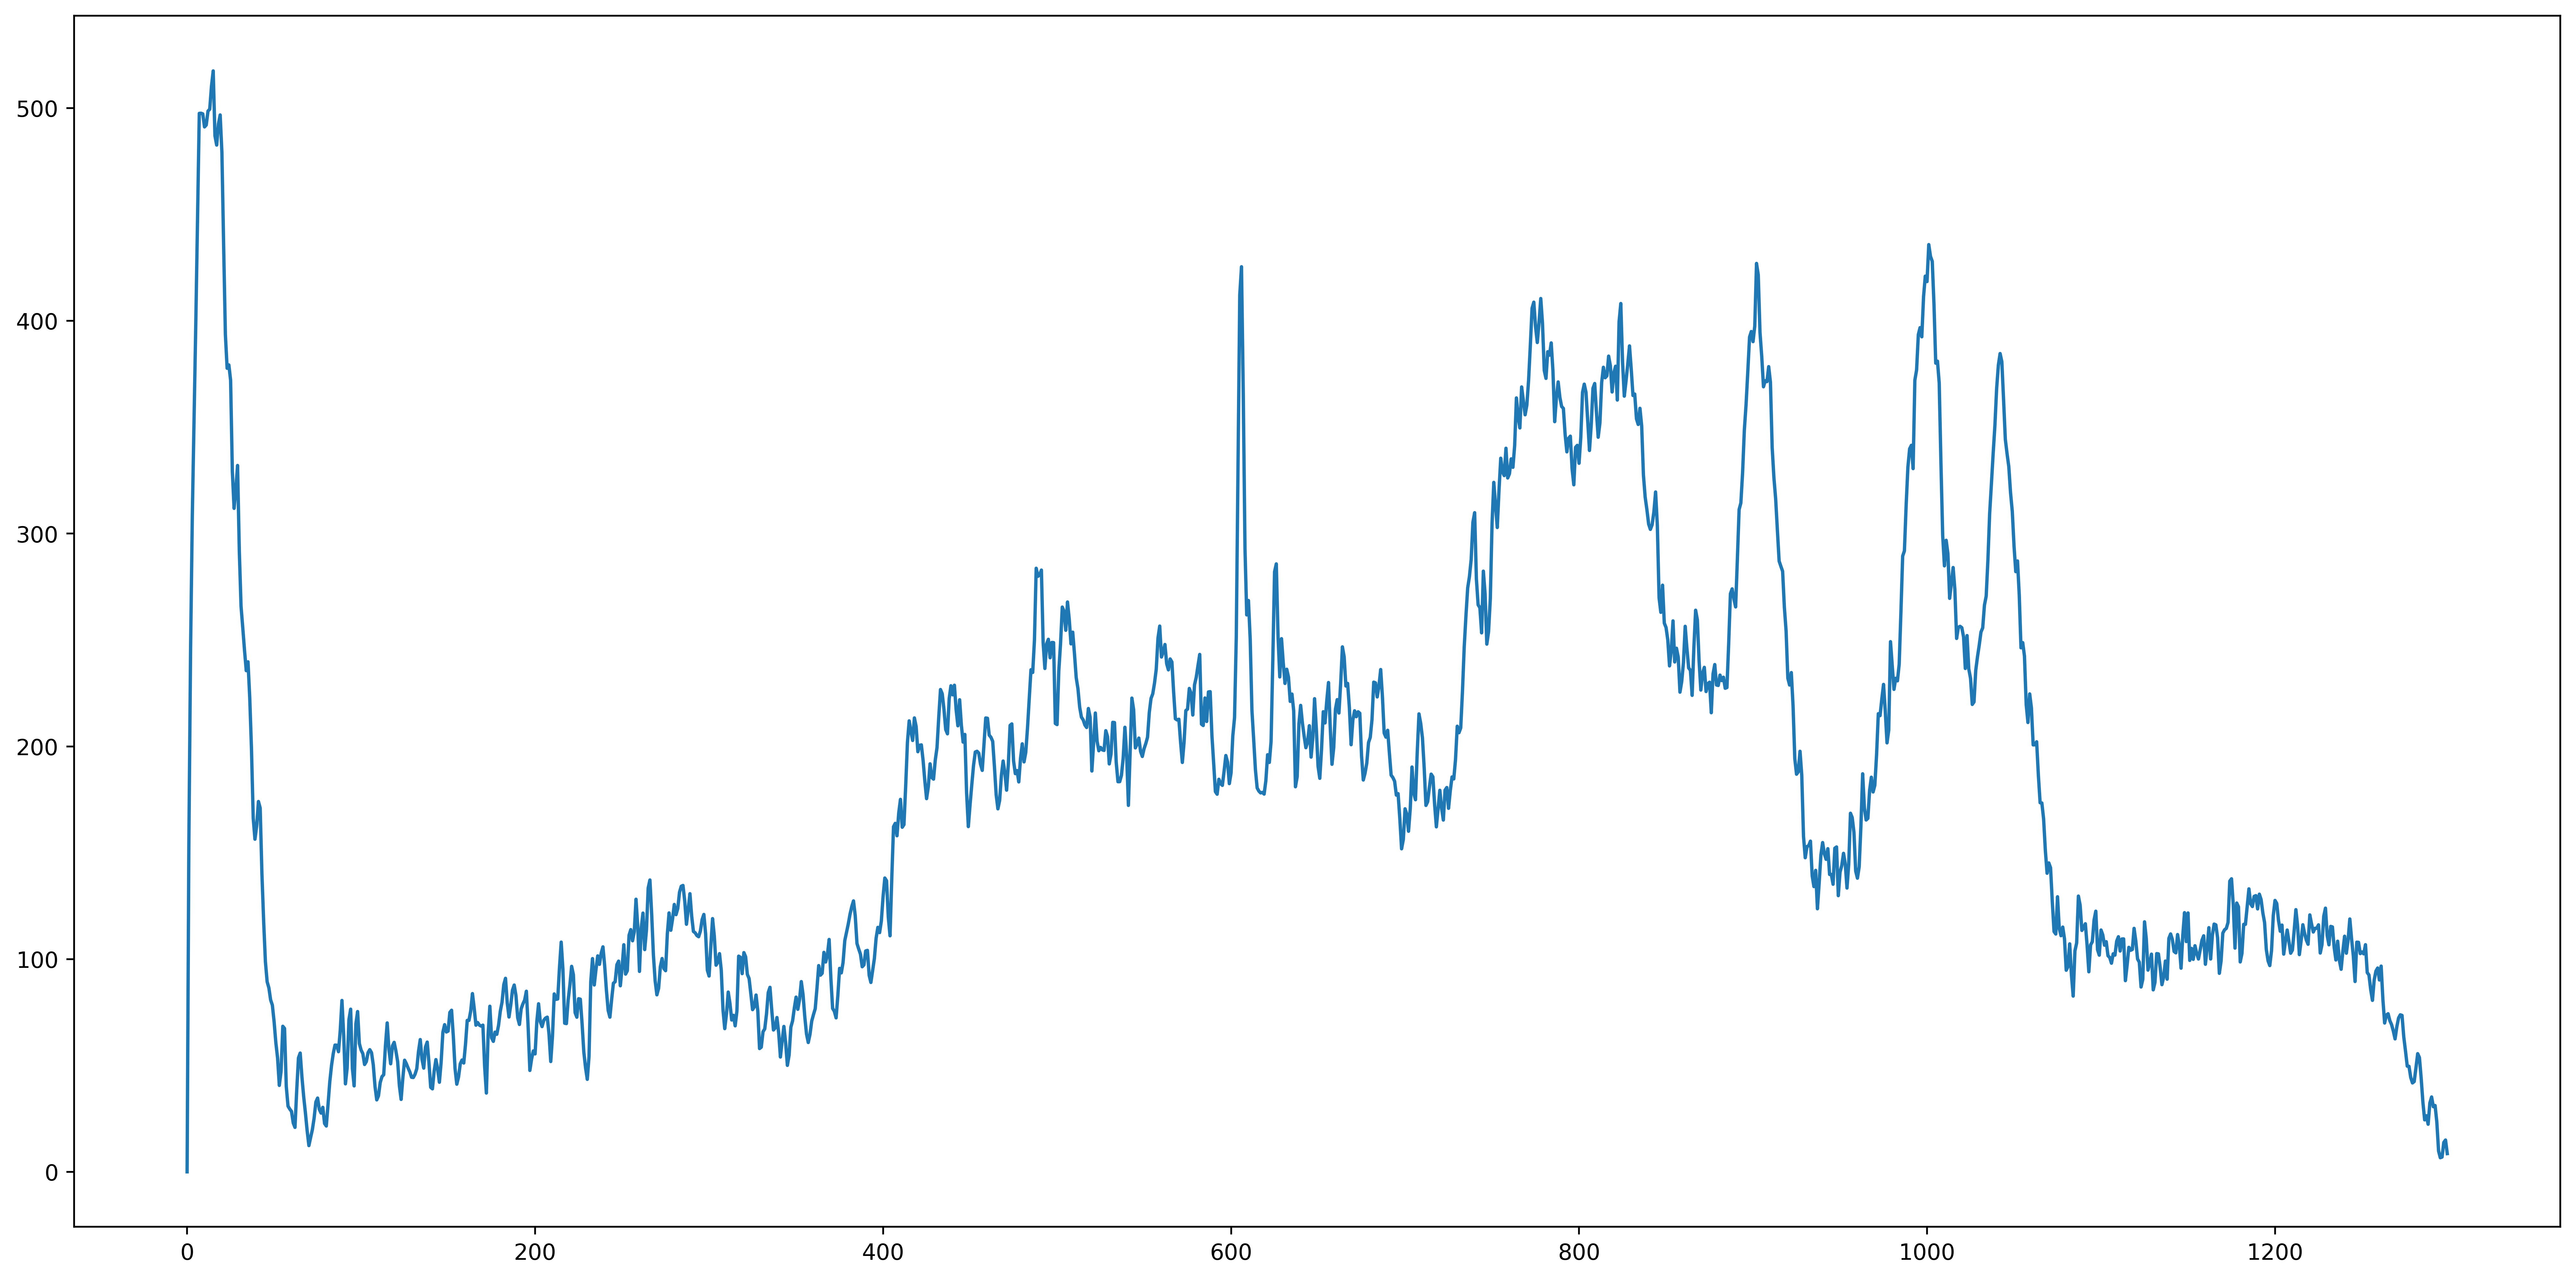